***Presented By - Group 9***

Nidhi Tawre- C024

Shreya Prasad -C040

Sneha Arunkumar- C044 

Snehal Kedar- C045

Vibha Deshpande - C046

Vydehi Tarigoppula - C048

## **Reservation Cancellation Prediction**

### **About Dataset**
Customer behavior and booking possibilities have been radically changed by online hotel reservation channels. Cancellations or no-shows cause a significant number of hotel reservations to be canceled. Cancellations can be caused by a variety of factors, such as scheduling conflicts, changes in plans, etc. In many cases, this is made easier by the possibility of doing so free or at a low cost, which is beneficial for hotel guests but less desirable and possibly revenue-diminishing for hotels.

As a Data Scientist, your job is to build a Machine Learning model to help the Hotel Owners better understand if the customer is going to honor the reservation or cancel it ?



### **Dataset Description**
The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below
Booking_ID: unique identifier of each booking

**No of adults:** Number of adults

**No of children:** Number of Children

**no of weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**no of week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**typeofmeal_plan:** Type of meal plan booked by the customer:

**requiredcarparking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)

**roomtypereserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

**lead_time:** Number of days between the date of booking and the arrival date

**arrival_year:** Year of arrival date

**arrival_month:** Month of arrival date

**arrival_date:** Date of the month

**Market segment type:** Market segment designation.

**repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)

**noofprevious_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking

**noofpreviousbookingsnot_canceled:** Number of previous bookings not canceled by the customer prior to the current booking

**avgpriceper_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

**noofspecial_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

**booking_status:** Flag indicating if the booking was canceled or not.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib.pyplot import figure

**Load Data**

In [94]:
#pip install kaggle

In [95]:
from google.colab import drive
drive.mount('/content/drive')

!ls '/content/drive/My Drive/Trim_3_Project/DL'

import os

# Set the current working directory to the path of your folder
os.chdir('/content/drive/My Drive/Trim_3_Project/DL')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Group9_DL.ipynb  model.png	   train_dataset.csv
Group9_model.h5  test_dataset.csv


In [96]:
# Reading the data set
df=pd.read_csv('train_dataset.csv')
test=pd.read_csv('test_dataset.csv')

In [97]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  4   
1             2               1                     0                  2   
2             1               0                     1                  5   
3             1               0                     2                  4   
4             2               0                     0                  4   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  0                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  1                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0        118          2017             12            28                    1   
1         17          2018              4            14                    1   
2        349          2018             10             4                    0   
3         69          2018              6            12                    0   
4         11          2018              1            20                    1   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0              110.80   
1                                     0              145.00   
2                                     0               96.67   
3                                     0              120.00   
4                                     0               69.50   

   no_of_special_requests  booking_status  
0                       2               0  
1                       0               1  
2                       0               1  
3                       0               1  
4                       1               0

In [98]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [99]:
df['booking_status'].value_counts()

0    12195
1     5942
Name: booking_status, dtype: int64

In [100]:
df.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  18137.000000    18137.000000          18137.000000       18137.000000   
mean       1.846777        0.107515              0.811104           2.208965   
std        0.516020        0.408901              0.873470           1.426365   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000        9.000000              7.000000          17.000000   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
count       18137.000000                18137.000000        18137.000000   
mean            0.318465                    0.031648            0.336770   
std             0.629140                    0.175066            0.772865   
min             0.000000                    0.000000            0.000000   
25%             0.000000                    0.000000            0.000000   
50%             0.000000                    0.000000            0.000000   
75%             0.000000                    0.000000            0.000000   
max             3.000000                    1.000000            6.000000   

          lead_time  arrival_year  arrival_month  arrival_date  \
count  18137.000000  18137.000000   18137.000000  18137.000000   
mean      85.377405   2017.820698       7.432762     15.660804   
std       86.611736      0.383616       3.076999      8.772788   
min        0.000000   2017.000000       1.000000      1.000000   
25%       17.000000   2018.000000       5.000000      8.000000   
50%       57.000000   2018.000000       8.000000     16.000000   
75%      127.000000   2018.000000      10.000000     23.000000   
max      443.000000   2018.000000      12.000000     31.000000   

       market_segment_type  repeated_guest  no_of_previous_cancellations  \
count         18137.000000    18137.000000                  18137.000000   
mean              0.806197        0.025087                      0.022440   
std               0.645972        0.156393                      0.370078   
min               0.000000        0.000000                      0.000000   
25%               0.000000        0.000000                      0.000000   
50%               1.000000        0.000000                      0.000000   
75%               1.000000        0.000000                      0.000000   
max               4.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          18137.000000        18137.000000   
mean                               0.151403          103.478868   
std                                1.714135           35.474103   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.270000   
max                               58.000000          540.000000   

       no_of_special_requests  booking_status  
count            18137.000000    18137.000000  
mean                 0.617522        0.327618  
std                  0.787941        0.469357  
min                  0.000000        0.000000  
25%                  0.000000        0.000000  
50%                  0.000000        0.000000  
75%                  1.000000        1.000000  
max                  5.000000        1.000000

In [101]:
df.shape

(18137, 18)

In [102]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Data Summary

In [103]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values * 100
    summ['%missing'] = df.isnull().sum().values / len(df)
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

In [104]:
pd.set_option('display.max_rows', None)
summary(df)

data shape: (18137, 18)


data type  #missing  %missing  #unique  \
no_of_adults                             int64         0       0.0        5   
no_of_children                           int64         0       0.0        5   
no_of_weekend_nights                     int64         0       0.0        8   
no_of_week_nights                        int64         0       0.0       18   
type_of_meal_plan                        int64         0       0.0        4   
required_car_parking_space               int64         0       0.0        2   
room_type_reserved                       int64         0       0.0        7   
lead_time                                int64         0       0.0      341   
arrival_year                             int64         0       0.0        2   
arrival_month                            int64         0       0.0       12   
arrival_date                             int64         0       0.0       31   
market_segment_type                      int64         0       0.0        5   
repeated_guest                           int64         0       0.0        2   
no_of_previous_cancellations             int64         0       0.0        9   
no_of_previous_bookings_not_canceled     int64         0       0.0       47   
avg_price_per_room                     float64         0       0.0     2722   
no_of_special_requests                   int64         0       0.0        6   
booking_status                           int64         0       0.0        2   

                                         min     max  first value  \
no_of_adults                             0.0     4.0          2.0   
no_of_children                           0.0     9.0          0.0   
no_of_weekend_nights                     0.0     7.0          1.0   
no_of_week_nights                        0.0    17.0          4.0   
type_of_meal_plan                        0.0     3.0          0.0   
required_car_parking_space               0.0     1.0          0.0   
room_type_reserved                       0.0     6.0          0.0   
lead_time                                0.0   443.0        118.0   
arrival_year                          2017.0  2018.0       2017.0   
arrival_month                            1.0    12.0         12.0   
arrival_date                             1.0    31.0         28.0   
market_segment_type                      0.0     4.0          1.0   
repeated_guest                           0.0     1.0          0.0   
no_of_previous_cancellations             0.0    13.0          0.0   
no_of_previous_bookings_not_canceled     0.0    58.0          0.0   
avg_price_per_room                       0.0   540.0        110.8   
no_of_special_requests                   0.0     5.0          2.0   
booking_status                           0.0     1.0          0.0   

                                      second value  third value  
no_of_adults                                   2.0         1.00  
no_of_children                                 1.0         0.00  
no_of_weekend_nights                           0.0         1.00  
no_of_week_nights                              2.0         5.00  
type_of_meal_plan                              0.0         0.00  
required_car_parking_space                     0.0         0.00  
room_type_reserved                             0.0         0.00  
lead_time                                     17.0       349.00  
arrival_year                                2018.0      2018.00  
arrival_month                                  4.0        10.00  
arrival_date                                  14.0         4.00  
market_segment_type                            1.0         0.00  
repeated_guest                                 0.0         0.00  
no_of_previous_cancellations                   0.0         0.00  
no_of_previous_bookings_not_canceled           0.0         0.00  
avg_price_per_room                           145.0        96.67  
no_of_special_requests                         0.0         0.00  
booking_status                     

Handling columns with unique value

In [105]:
unique_stats = df.nunique().reset_index().rename(columns ={'index': 'feature', 0: 'nunique'})
unique_stats[unique_stats['nunique'] == 1]

Empty DataFrame
Columns: [feature, nunique]
Index: []

** Arrival_Month Relation with Booking_Status**

In [106]:
px.histogram(df, x='arrival_month', color="booking_status", barmode='group',color_discrete_sequence=['#54C0CC','#1F4F59'])

**INSIGHT**

October is most common with 15.3% out of all records

Out of 39.2 % (Cancelled) bookings around 7.2% of them were from August

Out of 60.8 % (Not Cancelled) bookings around 8.4% of them were from October

In August 52.77% times booking get cancelled

Arrival_Date Relation with Booking_Status

In [107]:
px.histogram(df, x='arrival_date', color="booking_status", barmode='group',color_discrete_sequence=['#54C0CC','#1F4F59'])

**INSIGHT**

27 is most common with 3.9% out of all records

Out of 39.2 % (Cancelled) bookings around 1.7% of them had date 16

Out of 60.8 % (Not Cancelled) bookings around 2.5% of them had date 27

**No_of_Adults Relation with Booking_Status**

In [108]:
px.histogram(df, x='no_of_adults', color="booking_status", barmode='group',color_discrete_sequence=['#7EA00E','#DCD964'])

**INSIGHT**

2 is most common with 73.1% out of all records

Out of 39.2 % (Cancelled) bookings around 30.4% of them had 2 adults

Out of 60.8 % (Not Cancelled) bookings around 42.7% of them had 2 adults

For 1 Adult - 71.79% times booking get confirmed (and 28.21% times cancelled)

For 2 Adults - 41.53% times bookings get cancelled (and 58.47% times not cancelled)

**No_of_Weekend_Nights relation with Booking_Status**

In [109]:

px.histogram(df, x='no_of_weekend_nights', color="booking_status", barmode='group',color_discrete_sequence=['#7EA00E','#DCD964'])

**INSIGHT**

0 is most common with 43.1% out of all records

Out of 39.2 % (Cancelled) Bookings around 15.8% of them had 0

Out of 60.8 % (Not Cancelled) Bookings around 27.3% of them had 0

**No_of_Week_Nights relation with Booking_Status**

In [110]:
px.histogram(df, x='no_of_week_nights', color="booking_status", barmode='group',color_discrete_sequence=['#54C0CC','#1F4F59'])

**INSIGHT**

2 is most common with 30.7% out of all records

Out of 39.2 % (Cancelled) Bookings around 11.6% of them had 2

Out of 60.8 % (Not Cancelled) Bookings around 19.1% of them had 2

Type_of_Meal_Plan Relation with Booking_Status

In [111]:
px.histogram(df, x='type_of_meal_plan', color="booking_status", barmode='group',color_discrete_sequence=['#7EA00E','#DCD964'])

**INSIGHT**

0 is most common with 84.2% out of all records

Out of 39.2 % (Cancelled) Bookings around 31.7% of them had 0

Out of 60.8 % (Not Cancelled) Bookings around 52.5% of them had 0

**Room_Type_Reserved relation with Booking_Status**

In [112]:
px.histogram(df, x='room_type_reserved', color="booking_status", barmode='group',color_discrete_sequence=['#7EA00E','#DCD964'])

**INSIGHT**

0 is most common with 80.9% out of all records

Out of 39.2 % (Cancelled) Bookings around 27.9% of them had 0

Out of 60.8 % (Not Cancelled) Bookings around 43.0% of them had 0

## **Correlation Matrix**

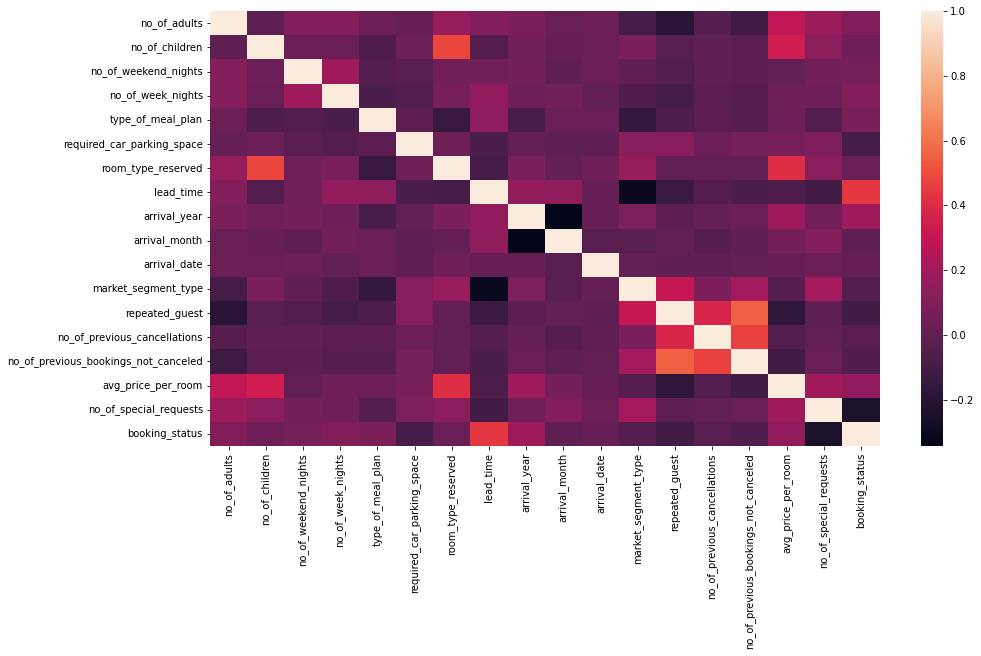

In [113]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=False);

## **Shuffling the data**

In [114]:
from sklearn.utils import shuffle
df = shuffle(df)

### Setting the target variable and independent variables

In [115]:
X=df.drop(['booking_status'],axis=1)
y=df['booking_status']

In [116]:
cols=X.columns
cols

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

## **Standardization** 

In [117]:
# Standardisation

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X=sc.fit_transform(X)

X=pd.DataFrame(X, columns=cols)
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0      0.296940       -0.262944              1.361156           1.956800   
1      0.296940       -0.262944              0.216265          -0.146506   
2     -1.641023       -0.262944             -0.928626          -0.847608   
3      0.296940       -0.262944              0.216265          -0.847608   
4      0.296940       -0.262944             -0.928626          -0.146506   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0          -0.506205                   -0.180783            0.858168   
1          -0.506205                   -0.180783           -0.435754   
2          -0.506205                   -0.180783           -0.435754   
3           2.672824                   -0.180783           -0.435754   
4           2.672824                   -0.180783           -0.435754   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0  -0.373833      0.467413       1.159356     -0.531294             0.300026   
1  -0.096726     -2.139435      -0.140648     -0.303310             0.300026   
2  -0.847223      0.467413      -0.140648      1.634554             1.848123   
3   1.866110      0.467413      -0.465649     -1.101254            -1.248072   
4  -0.131365     -2.139435       0.509354      0.266650            -1.248072   

   repeated_guest  no_of_previous_cancellations  \
0       -0.160413                     -0.060638   
1       -0.160413                     -0.060638   
2       -0.160413                     -0.060638   
3       -0.160413                     -0.060638   
4       -0.160413                     -0.060638   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                             -0.088329           -0.158116   
1                             -0.088329           -0.760544   
2                             -0.088329           -1.084733   
3                             -0.088329            0.324785   
4                             -0.088329            0.155643   

   no_of_special_requests  
0                4.292925  
1                0.485428  
2                0.485428  
3                0.485428  
4               -0.783738

## Splitting and training

In [118]:
from sklearn.model_selection import train_test_split

### Dividing the dataset into train and test in the ratio of 70 : 30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [119]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14509, 17), (3628, 17), (14509,), (3628,))

# **Building Model 1**

Insert Image

In [120]:
model1=tf.keras.Sequential()

model1.add(tf.keras.layers.Dense(50,activation='relu'))

model1.add(tf.keras.layers.Dense(1,activation='sigmoid'))

## Compling and traing model

Epoch 1/150
454/454 [==============================] - 4s 4ms/step - loss: 0.4827 - accuracy: 0.7645
Epoch 2/150
454/454 [==============================] - 2s 4ms/step - loss: 0.4132 - accuracy: 0.8083
Epoch 3/150
454/454 [==============================] - 2s 4ms/step - loss: 0.3996 - accuracy: 0.8127
Epoch 4/150
454/454 [==============================] - 2s 4ms/step - loss: 0.3925 - accuracy: 0.8191
Epoch 5/150
454/454 [==============================] - 2s 4ms/step - loss: 0.3874 - accuracy: 0.8247
Epoch 6/150
454/454 [==============================] - 3s 6ms/step - loss: 0.3832 - accuracy: 0.8251
Epoch 7/150
454/454 [==============================] - 3s 7ms/step - loss: 0.3801 - accuracy: 0.8298
Epoch 8/150
454/454 [==============================] - 2s 5ms/step - loss: 0.3772 - accuracy: 0.8294
Epoch 9/150
454/454 [==============================] - 2s 5ms/step - loss: 0.3750 - accuracy: 0.8313
Epoch 10/150
454/454 [==============================] - 2s 4ms/step - loss: 0.3721 - accura

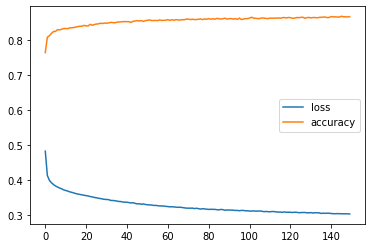

In [121]:
# compile and fit the model
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


history = model1.fit(X_train, y_train, epochs=150)

# plot the history
pd.DataFrame(history.history).plot();

In [122]:
# Evaluation of the model

model1.evaluate(X_test,y_test)

114/114 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8481


[0.3622968792915344, 0.848125696182251]

Model can be improved by adding more layers and there is slight overfitting as test loss is greater than training loss

**Model Summary**

In [123]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 50)                900       
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 951
Trainable params: 951
Non-trainable params: 0
_________________________________________________________________


**Plotting Model**

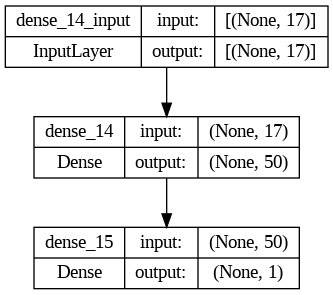

In [124]:
from tensorflow.keras.utils import plot_model

plot_model(model1, show_shapes=True)

# **Normalization**

In [125]:
# Normalization

normalizer=tf.keras.layers.Normalization()
normalizer.adapt(X_train)
normalizer.adapt(X_test)

X_train=normalizer(X_train)
X_test=normalizer(X_test)

# Model with


1.   cross validation
2.   batch normalization
3.   early stopping
4.   dropout layer



In [126]:
model2=tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(256,activation='relu'))

# Batch Normalisation
model2.add(tf.keras.layers.BatchNormalization())

# Dropout layer
model2.add(tf.keras.layers.Dropout(0.1)) # 10% of units will be dropped

model2.add(tf.keras.layers.Dense(128,activation='relu'))


model2.add(tf.keras.layers.Dense(64,activation='relu'))


model2.add(tf.keras.layers.Dense(32,activation='relu'))


model2.add(tf.keras.layers.Dense(1,activation='sigmoid'))


# Early Stopping
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Compiling the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])



Epoch 1/100
363/363 [==============================] - 3s 5ms/step - loss: 0.4303 - accuracy: 0.7968 - val_loss: 0.3701 - val_accuracy: 0.8298
Epoch 2/100
363/363 [==============================] - 2s 7ms/step - loss: 0.3868 - accuracy: 0.8233 - val_loss: 0.3563 - val_accuracy: 0.8422
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3664 - accuracy: 0.8345 - val_loss: 0.3634 - val_accuracy: 0.8429
Epoch 4/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3558 - accuracy: 0.8382 - val_loss: 0.3385 - val_accuracy: 0.8542
Epoch 5/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3432 - accuracy: 0.8415 - val_loss: 0.3393 - val_accuracy: 0.8508
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3324 - accuracy: 0.8515 - val_loss: 0.3290 - val_accuracy: 0.8622
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3303 - accuracy: 0.8539 - val_loss: 0.3267 - val_accuracy: 0.8580

[0.3419879972934723, 0.8608048558235168]

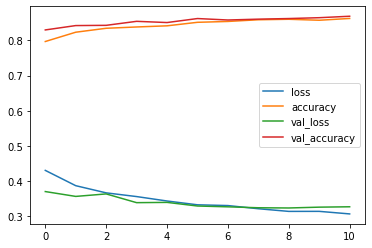

In [127]:
# Training
tf.random.set_seed(100)
## Validation split, callbacks
hist_4=model2.fit(X_train,y_train,epochs=100, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_4.history).plot();

print(' Evaluation Result:\n')
model2.evaluate(X_test,y_test)

In [128]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               4608      
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                      

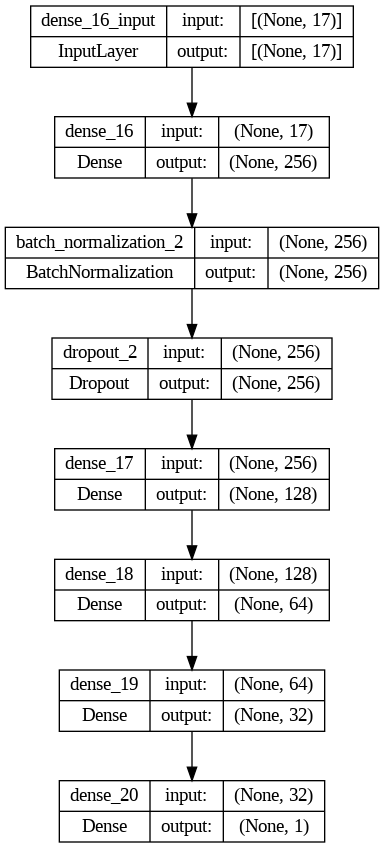

In [129]:
from tensorflow.keras.utils import plot_model

plot_model(model2, show_shapes=True)

# Predict Model

In [130]:
model2.predict(X_test)

114/114 [==============================] - 0s 2ms/step


array([[3.9061585e-01],
       [5.3873070e-04],
       [6.9202548e-01],
       ...,
       [3.5500899e-01],
       [9.1091853e-01],
       [1.2184831e-01]], dtype=float32)

## Saving the model

In [131]:
model2.save('Group9_model.h5')

## Loading the model

In [132]:
group9=tf.keras.models.load_model('Group9_model.h5')

In [133]:
group9.evaluate(X_test,y_test)

114/114 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8608


[0.3419879972934723, 0.8608048558235168]